In [ ]:
import tensorflow as tf

data_dir = "/kaggle/input/traffic-sign-classification-datasets/traffic_Data/DATA"


In [ ]:
import os

dataset_path = '/kaggle/input/traffic-sign-classification-datasets/traffic_Data/DATA'
dataset_size = sum(os.path.getsize(os.path.join(dataset_path, f)) for f in os.listdir(dataset_path))

print(f"Dataset size: {dataset_size} bytes")


Dataset size: 237568 bytes


In [ ]:
train_dir="/kaggle/input/traffic-sign-classification-datasets/traffic_Data/train"

In [ ]:
test_dir="/kaggle/input/traffic-sign-classification-datasets/traffic_Data/test"

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1.0/255)#initialize train generator 
                                 
test_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize validation generator

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(128,128),batch_size=32,class_mode='categorical')

#validation_generator = valid_datagen.flow_from_directory(validation_ds, target_size=(128,128),batch_size=32,class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(128,128),batch_size=32,class_mode='categorical')

Found 5013 images belonging to 58 classes.

Found 873 images belonging to 58 classes.


In [ ]:
import os

train_dir = '/kaggle/input/traffic-sign-classification-datasets/traffic_Data/train'

# Count the number of images in each subdirectory
for class_name in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, class_name)
    if os.path.isdir(class_dir):
        num_images = len(os.listdir(class_dir))
        print("Class {}: {} images".format(class_name, num_images))


Class 0: 100 images

Class 1: 70 images

Class 10: 100 images

Class 11: 115 images

Class 12: 100 images

Class 13: 92 images

Class 14: 100 images

Class 15: 72 images

Class 16: 119 images

Class 17: 100 images

Class 18: 32 images

Class 19: 16 images

Class 2: 100 images

Class 20: 56 images

Class 21: 40 images

Class 22: 52 images

Class 23: 52 images

Class 24: 100 images

Class 25: 10 images

Class 26: 100 images

Class 27: 60 images

Class 28: 339 images

Class 29: 100 images

Class 3: 203 images

Class 30: 120 images

Class 31: 100 images

Class 32: 40 images

Class 33: 16 images

Class 34: 82 images

Class 35: 116 images

Class 36: 100 images

Class 37: 100 images

Class 38: 86 images

Class 39: 80 images

Class 4: 100 images

Class 40: 82 images

Class 41: 52 images

Class 42: 92 images

Class 43: 100 images

Class 44: 88 images

Class 45: 74 images

Class 46: 60 images

Class 47: 40 images

Class 48: 28 images

Class 49: 98 images

Class 5: 155 images

Class 50: 100 image

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from skimage.transform import resize

# Define the path to your train folder containing the images
train_dir = '/kaggle/input/traffic-sign-classification-datasets/traffic_Data/train'

# Define the number of images you want to generate for each class
num_samples = 100

# Define the parameters for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)

# Get a list of the classes in the train folder
classes = sorted(os.listdir(train_dir))

# Generate balanced samples for each class
for class_name in classes:
    class_dir = os.path.join(train_dir, class_name)
    num_existing_samples = len(os.listdir(class_dir))
    if num_existing_samples < num_samples:
        num_to_generate = num_samples - num_existing_samples
        print(f"Generating {num_to_generate} samples for class {class_name}")
        image_files = [os.path.join(class_dir, f) for f in os.listdir(class_dir)]
        image_array = np.array([resize(plt.imread(f), (128, 128)) for f in image_files])
        if not os.path.exists(class_dir):
            os.makedirs(class_dir)
        flow = datagen.flow(image_array, batch_size=32, save_to_dir=class_dir, save_prefix=class_name, save_format='png')
        for i in range(num_to_generate // 32):
            flow.next()
        remaining = num_to_generate % 32
        if remaining > 0:
            flow = datagen.flow(image_array, batch_size=remaining, save_to_dir=class_dir, save_prefix=class_name, save_format='png')
            flow.next()
    else:
        print(f"Class {class_name} is already balanced")


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Class 0 is already balanced
Generating 30 samples for class 1


In [ ]:
img=train_generator[0]
img

(array([[[[0.8980393 , 0.91372555, 0.8862746 ],
          [0.8980393 , 0.9176471 , 0.89019614],
          [0.90196085, 0.9176471 , 0.89019614],
          ...,
          [0.96470594, 0.9725491 , 0.94117653],
          [0.9803922 , 0.9843138 , 0.9450981 ],
          [0.9921569 , 1.        , 0.9568628 ]],
 
         [[0.8980393 , 0.9176471 , 0.89019614],
          [0.8941177 , 0.91372555, 0.8862746 ],
          [0.8941177 , 0.909804  , 0.882353  ],
          ...,
          [0.97647065, 0.9803922 , 0.9568628 ],
          [0.9843138 , 0.98823535, 0.9607844 ],
          [0.9843138 , 0.9921569 , 0.9607844 ]],
 
         [[0.9176471 , 0.93725497, 0.909804  ],
          [0.91372555, 0.9333334 , 0.9058824 ],
          [0.909804  , 0.9294118 , 0.90196085],
          ...,
          [0.9843138 , 0.9843138 , 0.96470594],
          [0.9843138 , 0.9843138 , 0.96470594],
          [0.9803922 , 0.9803922 , 0.9607844 ]],
 
         ...,
 
         [[0.854902  , 0.8705883 , 0.8470589 ],
          [0.85882

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import tensorflow as tf

def MobileNet(input_shape=(128, 128, 3), num_classes=58):
    inputs = tf.keras.layers.Input(shape=input_shape)
    x = tf.keras.layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)

    x = depthwise_separable_convolution(x, filters=64, alpha=1)

    x = depthwise_separable_convolution(x, filters=128, alpha=1, strides=(2, 2))
    x = depthwise_separable_convolution(x, filters=128, alpha=1)

    x = depthwise_separable_convolution(x, filters=256, alpha=1, strides=(2, 2))
    x = depthwise_separable_convolution(x, filters=256, alpha=1)

    x = depthwise_separable_convolution(x, filters=512, alpha=1, strides=(2, 2))
    for i in range(5):
        x = depthwise_separable_convolution(x, filters=512, alpha=1)

    x = depthwise_separable_convolution(x, filters=1024, alpha=1, strides=(2, 2))
    x = depthwise_separable_convolution(x, filters=1024, alpha=1)

    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Reshape((1, 1, 1024))(x)
    x = tf.keras.layers.Dropout(0.5)(x)

    x = tf.keras.layers.Conv2D(num_classes, (1, 1), padding='same')(x)
    x = tf.keras.layers.Activation('softmax')(x)
    x = tf.keras.layers.Reshape((num_classes,))(x)

    model = tf.keras.models.Model(inputs=inputs, outputs=x)

    return model


def depthwise_separable_convolution(inputs, filters, alpha, strides=(1, 1)):
    """Depthwise separable convolution block."""
    filters = int(filters * alpha)

    # Depthwise Convolution
    x = tf.keras.layers.DepthwiseConv2D((3, 3), padding='same', strides=strides)(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)

    # Pointwise Convolution
    x = tf.keras.layers.Conv2D(filters, (1, 1), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)

    return x


In [ ]:
# Define the MobileNet model
model = MobileNet()

# Print the model summary
model.summary()


Model: "model"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         

                                                                 

 conv2d (Conv2D)             (None, 64, 64, 32)        896       

                                                                 

 batch_normalization (BatchN  (None, 64, 64, 32)       128       

 ormalization)                                                   

                                                                 

 activation (Activation)     (None, 64, 64, 32)        0         

                                                                 

 depthwise_conv2d (Depthwise  (None, 64, 64, 32)       320       

 Conv2D)                                                         

                                                                 

 batch_normalization_1 (Batc  (None, 64, 64, 

In [ ]:
type(data_dir)

str

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
har = model.fit(train_generator, epochs=5, batch_size=32, validation_data=(test_generator))


Epoch 1/5

157/157 [==============================] - 1183s 7s/step - loss: 3.5527 - accuracy: 0.1368 - val_loss: 4.0822 - val_accuracy: 0.0779

Epoch 2/5

157/157 [==============================] - 232s 1s/step - loss: 2.3037 - accuracy: 0.3519 - val_loss: 4.7786 - val_accuracy: 0.0401

Epoch 3/5

157/157 [==============================] - 231s 1s/step - loss: 1.5276 - accuracy: 0.5374 - val_loss: 5.4876 - val_accuracy: 0.0401

Epoch 4/5

157/157 [==============================] - 231s 1s/step - loss: 0.9480 - accuracy: 0.7036 - val_loss: 5.4762 - val_accuracy: 0.0137

Epoch 5/5

157/157 [==============================] - 235s 1s/step - loss: 0.6005 - accuracy: 0.8111 - val_loss: 0.7728 - val_accuracy: 0.7835


In [ ]:
import numpy as np 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
file_list = os.listdir(test_dir)
num_files = len(file_list)
batch_size = 32
num_batches = int(num_files / batch_size)

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(har.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,3.552745,0.136844,4.082189,0.077892
1,2.303705,0.351885,4.778605,0.040092
2,1.527568,0.537403,5.487582,0.040092
3,0.947990,0.703571,5.476180,0.013746
4,0.600459,0.811091,0.772808,0.783505


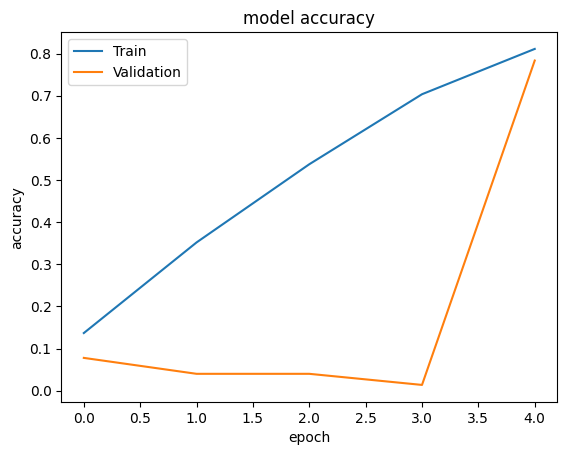

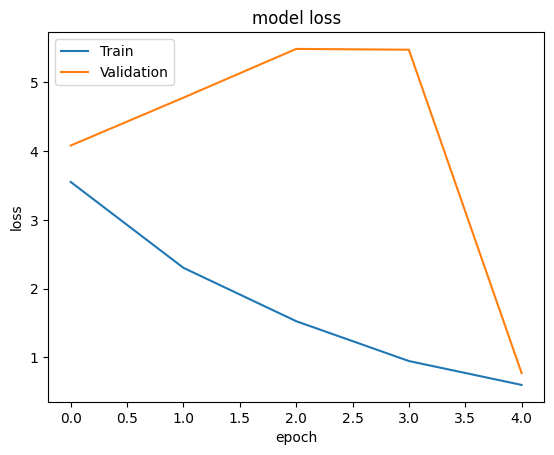

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(har.history['accuracy'])
plt.plot(har.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(har.history['loss'])
plt.plot(har.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
los = tf.keras.losses.SparseCategoricalCrossentropy()


model.compile(
    
    optimizer = opt,
    loss = los,
    metrics=acc
)

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

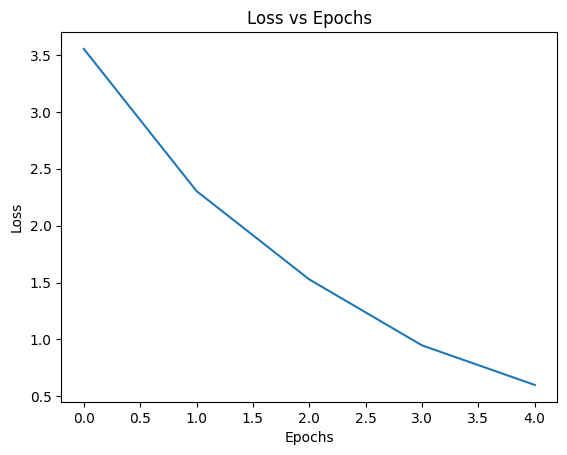

In [ ]:

loss_plot = df.plot(y='loss', title='Loss vs Epochs', legend=False)
loss_plot.set(xlabel='Epochs', ylabel='Loss')

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

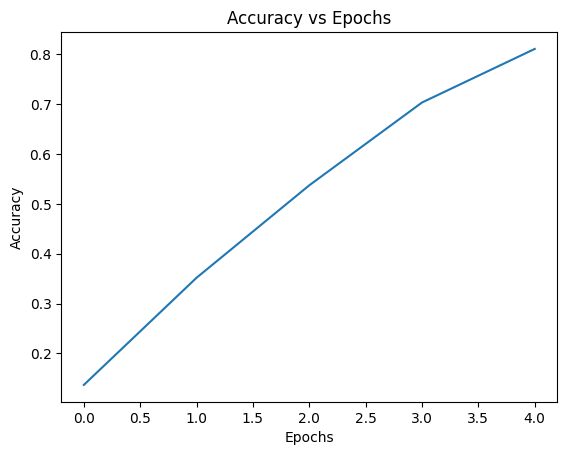

In [ ]:
acc_plot = df.plot(y='accuracy', title='Accuracy vs Epochs', legend=False)
acc_plot.set(xlabel='Epochs', ylabel='Accuracy')

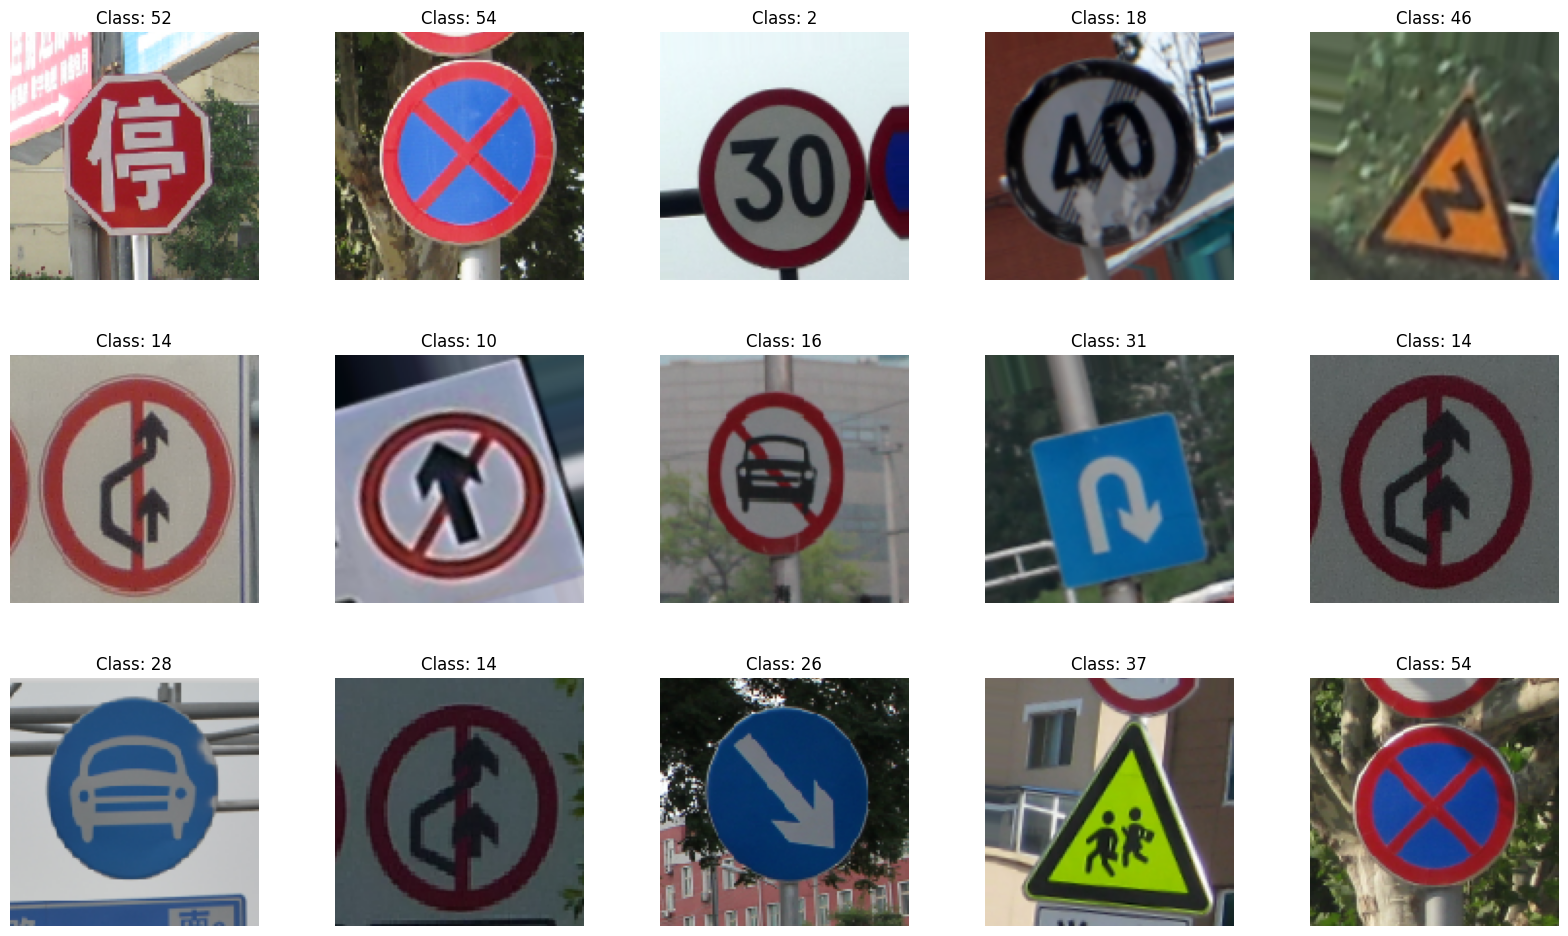

In [ ]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

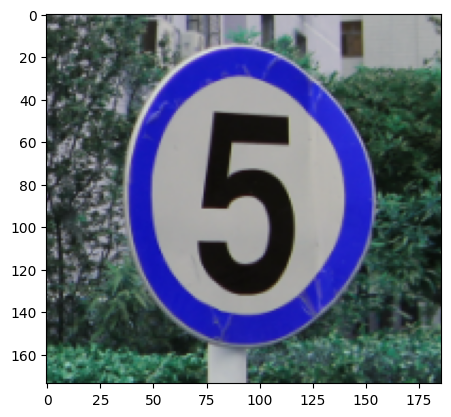

In [ ]:

import cv2

t=cv2.imread('/content/gdrive/MyDrive/traffic_Data/test/0/000_0011.png')
plt.imshow(t)

In [ ]:

import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
testimg=cv2.resize(t,(128,128))
testimg=img_to_array(testimg)/255
h=np.expand_dims(testimg,axis=0)
r=model.predict(h)
classnames=["0","1","2","3","4","5","6","7","8","9","10",
            "11","12","13","14","15","16","17","18","19","20",
            "21","22","23","24","25","26","27","28","29","30",
            "31","32","33","34","35","36","37","38","39","40",
            "41","42","43","44","45","46","47","48","49","50"
            "51","52","53","54","55","56","57"]
ypred=classnames[np.argmax(r)]
ypred

1/1 [==============================] - 1s 833ms/step


'2'